# Korean Bakery Sales Analysis Report

**Author:** Patrick MAALOUF
**Date:** October 15, 2025

---

## 1. Introduction

The goal of this analysis is to understand customer purchasing patterns at a small Korean bakery. By analyzing sales data from the "Bea Min" delivery platform, we will answer two key business questions:

1.  **What are the bakery's best-selling products?**
2.  **What are the peak sales periods (by day of the week and hour of the day)?**

The insights from this report can help the bakery optimize inventory, schedule staff more effectively, and plan targeted promotions.01_Bakery_Sales_EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set some styling for our plots
sns.set_style('whitegrid')

In [3]:
# Load the dataset from the 01_Data folder
df = pd.read_csv('../01_Data/bakery_data.csv')

In [4]:
# See the first 5 rows
df.head()

# Get a summary of all columns, data types, and non-null counts
df.info()

# Get descriptive statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2421 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           1973 non-null   float64
 5   plain bread         857 non-null    float64
 6   jam                 220 non-null    float64
 7   americano           412 non-null    float64
 8   croissant           747 non-null    float64
 9   caffe latte         193 non-null    float64
 10  tiramisu croissant  779 non-null    float64
 11  cacao deep          323 non-null    float64
 12  pain au chocolat    587 non-null    float64
 13  almond croissant    202 non-null    float64
 14  croque monsieur     0 non-null      float64
 15  mad garlic          0 non-null      float64
 16  milk t

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
count,2.420000e+03,1973.000000,857.000000,220.000000,412.000000,747.000000,193.000000,779.000000,323.000000,587.000000,...,196.000000,343.000000,90.000000,35.000000,519.000000,355.000000,209.000000,54.000000,7.0,47.000000
mean,2.117252e+04,1.636594,1.199533,1.131818,1.245146,1.404284,1.108808,1.213094,1.126935,1.236797,...,1.071429,1.148688,1.022222,1.085714,1.090559,1.340845,1.153110,1.018519,1.0,1.042553
std,2.699727e+04,1.115636,0.510268,0.433617,0.527216,1.027704,0.373016,0.797350,0.393249,0.601598,...,0.258199,0.499757,0.148231,0.373491,0.306757,0.614692,0.523948,0.136083,0.0,0.204030
min,1.280000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
25%,1.580000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
50%,1.850000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
75%,2.300000e+04,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.0,1.000000
max,1.293000e+06,11.000000,5.000000,5.000000,5.000000,16.000000,3.000000,14.000000,4.000000,6.000000,...,2.000000,5.000000,2.000000,3.000000,4.000000,6.000000,4.000000,2.000000,1.0,2.000000


## 2. Data Preparation

Before analysis, the raw data must be cleaned and prepared. The following steps were taken:

* **Handling Missing Values:** Null values in product columns mean an item was not purchased, so they were filled with `0`. Nulls in the `place` column were filled with `"N/A"`. Rows with missing core data like `datetime` or `total` were removed to ensure accuracy.
* **Correcting Data Types:** The `datetime` column was converted from text to a proper datetime format.
* **Feature Engineering:** New columns (`hour`, `month`, `year`) were created from the `datetime` column to enable time-based analysis.

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info() # Run info() again to confirm the change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            2421 non-null   datetime64[ns]
 1   day of week         2420 non-null   object        
 2   total               2420 non-null   float64       
 3   place               2166 non-null   object        
 4   angbutter           1973 non-null   float64       
 5   plain bread         857 non-null    float64       
 6   jam                 220 non-null    float64       
 7   americano           412 non-null    float64       
 8   croissant           747 non-null    float64       
 9   caffe latte         193 non-null    float64       
 10  tiramisu croissant  779 non-null    float64       
 11  cacao deep          323 non-null    float64       
 12  pain au chocolat    587 non-null    float64       
 13  almond croissant    202 non-null    float64     

In [6]:
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

In [7]:
df.isnull().sum()

datetime               233
day of week            234
total                  234
place                  488
angbutter              681
plain bread           1797
jam                   2434
americano             2242
croissant             1907
caffe latte           2461
tiramisu croissant    1875
cacao deep            2331
pain au chocolat      2067
almond croissant      2452
croque monsieur       2654
mad garlic            2654
milk tea              2517
gateau chocolat       2458
pandoro               2311
cheese cake           2564
lemon ade             2619
orange pound          2135
wiener                2299
vanila latte          2445
berry ade             2600
tiramisu              2647
merinque cookies      2607
hour                   233
month                  233
year                   233
dtype: int64

In [8]:
# Create a list of all your product columns
product_columns = [
    'angbutter', 'plain bread', 'jam', 'americano', 'croissant', 'caffe latte',
    'tiramisu croissant', 'cacao deep', 'pain au chocolat', 'almond croissant',
    'croque monsieur', 'mad garlic', 'milk tea', 'gateau chocolat', 'pandoro',
    'cheese cake', 'lemon ade', 'orange pound', 'wiener', 'vanila latte',
    'berry ade', 'tiramisu', 'merinque cookies'
]

# Replace null values in these columns with 0
df[product_columns] = df[product_columns].fillna(0)

In [9]:
# Drop rows where 'datetime' or 'total' is missing
df.dropna(subset=['datetime', 'total'], inplace=True)

In [10]:
df['place'] = df['place'].fillna('N/A')

In [11]:
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
datetime              0
day of week           0
total                 0
place                 0
angbutter             0
plain bread           0
jam                   0
americano             0
croissant             0
caffe latte           0
tiramisu croissant    0
cacao deep            0
pain au chocolat      0
almond croissant      0
croque monsieur       0
mad garlic            0
milk tea              0
gateau chocolat       0
pandoro               0
cheese cake           0
lemon ade             0
orange pound          0
wiener                0
vanila latte          0
berry ade             0
tiramisu              0
merinque cookies      0
hour                  0
month                 0
year                  0
dtype: int64


## 3. Analysis & Findings

With the data cleaned, we can now analyze it to answer our key questions.

In [12]:
# Select only the product columns (from 'angbutter' to 'merinque cookies') and sum them up
product_sales = df.loc[:, 'angbutter':'merinque cookies'].sum().sort_values(ascending=False)

print("Total Sales per Product:")
print(product_sales)

Total Sales per Product:
angbutter             3229.0
croissant             1049.0
plain bread           1028.0
tiramisu croissant     945.0
pain au chocolat       726.0
orange pound           566.0
americano              513.0
wiener                 476.0
pandoro                394.0
cacao deep             364.0
jam                    249.0
vanila latte           241.0
almond croissant       235.0
caffe latte            214.0
gateau chocolat        210.0
milk tea               160.0
cheese cake             92.0
berry ade               55.0
merinque cookies        49.0
lemon ade               38.0
tiramisu                 7.0
mad garlic               0.0
croque monsieur          0.0
dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_7608\3232793782.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.head(10).values, y=product_sales.head(10).index, palette='viridis')


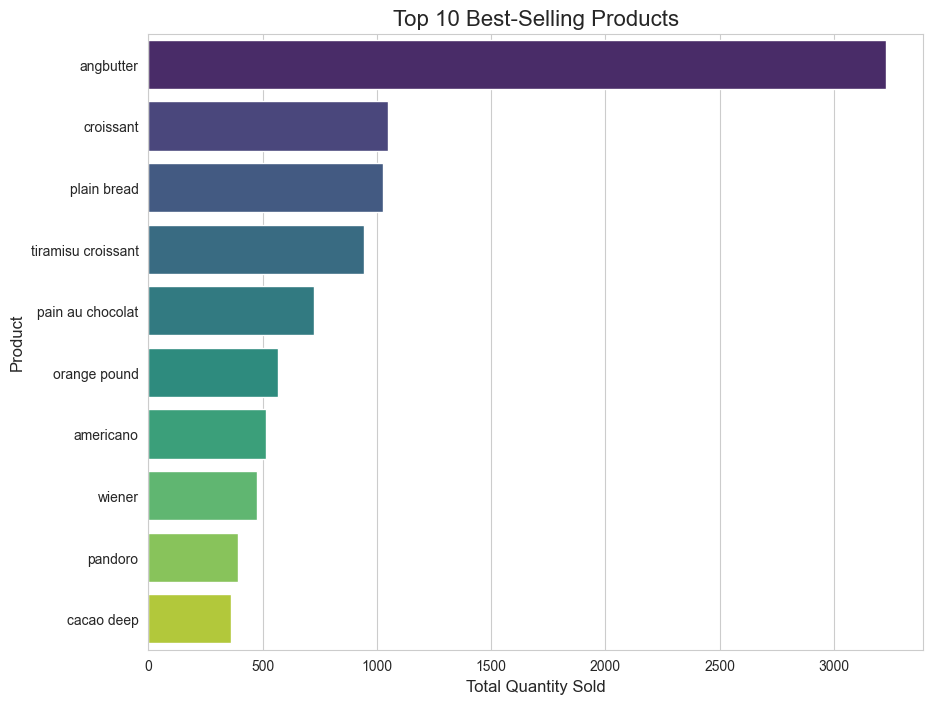

In [13]:
plt.figure(figsize=(10, 8))
sns.barplot(x=product_sales.head(10).values, y=product_sales.head(10).index, palette='viridis')
plt.title('Top 10 Best-Selling Products', fontsize=16)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Product', fontsize=12)

# Save the chart to your visualizations folder
plt.savefig('../04_Visualizations/top_10_products.png', bbox_inches='tight')

plt.show()

**Finding:** The analysis clearly shows that **Angbutter** is the most popular product by a significant margin. **Plain Bread** and **Americano** are also very popular items. This suggests these are the bakery's signature products.

In [14]:
# Orders per day of the week
orders_by_day = df['day of week'].value_counts()

# Define the correct order for the days
day_order = ['Mon', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
orders_by_day = orders_by_day.reindex(day_order)

print("Number of Orders by Day of Week:")
print(orders_by_day)

Number of Orders by Day of Week:
day of week
Mon    332.0
Wed    360.0
Thu      NaN
Fri    334.0
Sat    452.0
Sun    554.0
Name: count, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_7608\1455983824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette='plasma')


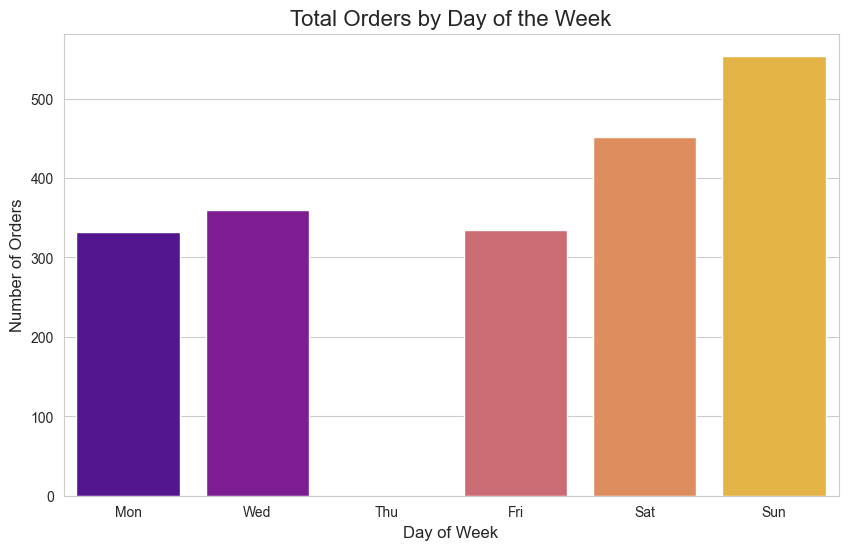

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette='plasma')
plt.title('Total Orders by Day of the Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.savefig('../04_Visualizations/orders_by_day.png', bbox_inches='tight')

plt.show()

**Finding:** The busiest day for the bakery is **Saturday**, followed by Sunday and Friday. Sales are significantly lower on weekdays, with Monday being the quietest. This highlights the importance of the weekend for business.

In [16]:
orders_by_hour = df['hour'].value_counts().sort_index()

print("Number of Orders by Hour of Day:")
print(orders_by_hour)

Number of Orders by Hour of Day:
hour
11.0    706
12.0    552
13.0    446
14.0    343
15.0    219
16.0    125
17.0     27
22.0      1
23.0      1
Name: count, dtype: int64


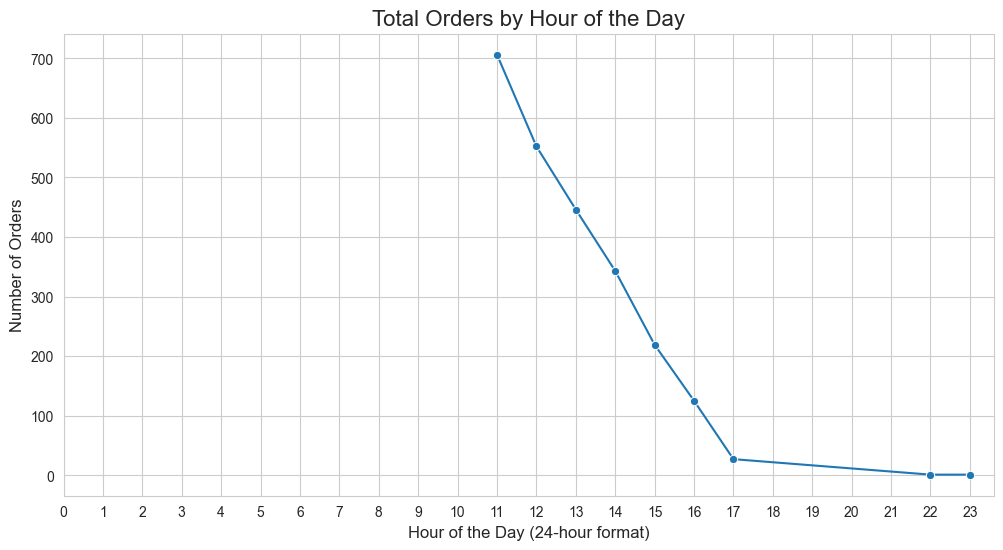

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=orders_by_hour.index, y=orders_by_hour.values, marker='o')
plt.title('Total Orders by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(0, 24)) # Ensure all hours are shown on the x-axis

plt.savefig('../04_Visualizations/orders_by_hour.png', bbox_inches='tight')

plt.show()

**Finding:** The data shows a clear sales peak in the afternoon. The busiest period is between **11:00 AM and 3:00 PM (15)**, which is likely lunchtime and the afternoon coffee break for customers.

## 4. Conclusion & Recommendations 💡

This analysis of the bakery's sales data provides clear, actionable insights.

**Summary of Findings:**
* **Top Products:** The most popular items are **Angbutter**, **Plain Bread**, and **Americano**.
* **Busiest Day:** **Saturday** is the day with the highest number of orders.
* **Peak Hours:** The busiest time of day is from **11:00 AM to 3:00 PM**.

**Recommendations for the Bakery:**
1.  **Inventory Management:** Ensure high stock levels of Angbutter and Plain Bread, especially before the weekend, to meet customer demand and avoid selling out.
2.  **Staffing:** Schedule more staff on Saturdays and during the 11-3 PM peak window to manage order preparation and delivery coordination efficiently.
3.  **Marketing & Promotions:** Consider running a "Weekday Morning Special" to boost sales during slower periods. Promotions on the delivery app could be targeted to appear just before the 1 PM peak to capture customer attention.